In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
#import xgboost as xgb

In [3]:
train  = pd.read_csv('/Users/cyyuen_angie/Python/Kaggle/Walmart/train.csv')
test   = pd.read_csv('/Users/cyyuen_angie/Python/Kaggle/Walmart/test.csv')

In [4]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017


In [4]:
test.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,1,Friday,72503389714,1,SHOES,3002
1,1,Friday,1707710732,1,DAIRY,1526
2,1,Friday,89470001026,1,DAIRY,1431
3,1,Friday,88491211470,1,GROCERY DRY GOODS,3555
4,2,Friday,2840015224,1,DSD GROCERY,4408


In [5]:
test.info()
print("----------------------------")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653646 entries, 0 to 653645
Data columns (total 6 columns):
VisitNumber              653646 non-null int64
Weekday                  653646 non-null object
Upc                      649660 non-null float64
ScanCount                653646 non-null int64
DepartmentDescription    652318 non-null object
FinelineNumber           649660 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 34.9+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.5+ MB


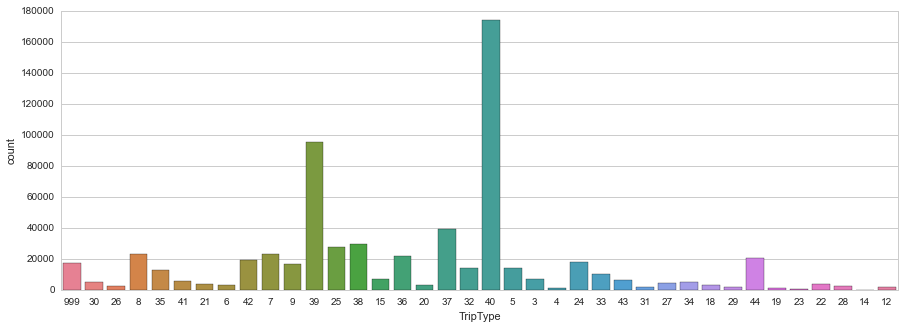

In [7]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='TripType', data=train, palette="husl", ax=axis1)

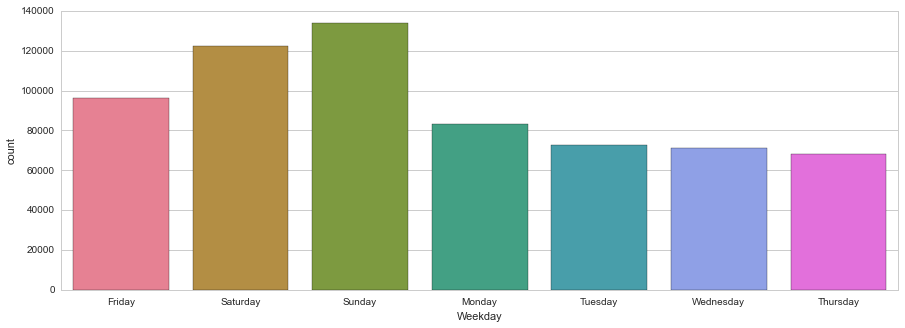

In [8]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Weekday', data=train, palette="husl", ax=axis1)

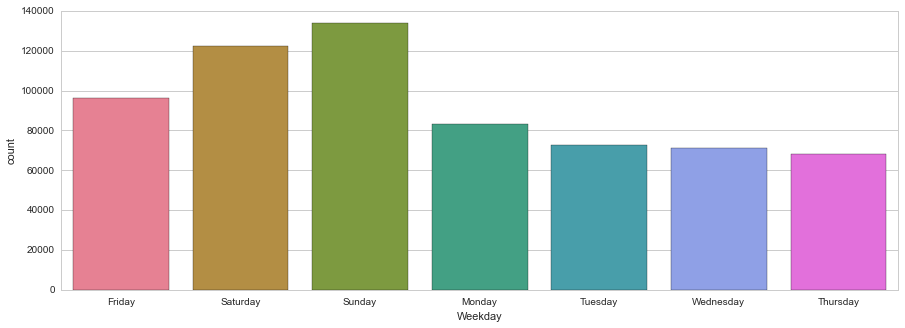

In [59]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Weekday', data=train, palette="husl", ax=axis1)

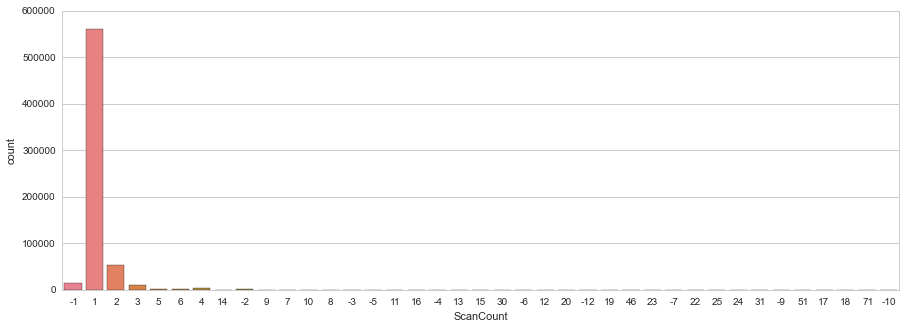

In [60]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='ScanCount', data=train, palette="husl", ax=axis1)

In [36]:
df = pd.DataFrame(train)
a=df.groupby('VisitNumber')['Upc'].agg(["count"])
b=df.groupby('VisitNumber')['DepartmentDescription'].agg(["count"])
c=df.groupby('VisitNumber')['FinelineNumber'].agg(["count"])
d=df.groupby('VisitNumber')['ScanCount'].agg([np.sum])
a=a.rename(columns = {'count':'CountUPC'})
b=b.rename(columns = {'count':'CountDepart'})
c=c.rename(columns = {'count':'CountFineline'})
d=d.rename(columns = {'sum':'Totalitems'})

In [37]:
frames=[a,b,c,d]
newvar = pd.concat(frames, axis=1, join='inner')
train2 = train.join(newvar, on='VisitNumber')
train2.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CountUPC,CountDepart,CountFineline,Totalitems
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000,1,1,1,-1
1,30,7,Friday,60538815980,1,SHOES,8931,2,2,2,2
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504,2,2,2,2
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565,22,22,22,28
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,22,22,22,28


In [21]:
temp=df.groupby('DepartmentDescription')['FinelineNumber'].agg(["count"])
temp2=df.groupby(['DepartmentDescription', 'FinelineNumber']).agg(["count"])
temp3=df.groupby(['FinelineNumber','DepartmentDescription',]).agg(["count"])
temp3

TripType VisitNumber Weekday   Upc  \
                                             count       count   count count   
FinelineNumber DepartmentDescription                                           
0              FINANCIAL SERVICES             3797        3797    3797  3797   
               FROZEN FOODS                      4           4       4     4   
               HORTICULTURE AND ACCESS           6           6       6     6   
               HOUSEHOLD CHEMICALS/SUPP          4           4       4     4   
               LAWN AND GARDEN                   1           1       1     1   
               OTHER DEPARTMENTS                23          23      23    23   
               PHARMACY OTC                      2           2       2     2   
1              AUTOMOTIVE                       12          12      12    12   
               BOOKS AND MAGAZINES               1           1       1     1   
               CAMERAS AND SUPPLIES             14          14      14    14   
               GIRLS WEAR, 4-6X  AND 7-14        1           1       1     1   
               PERSONAL CARE                   433         433     433   433   
2              BEDDING                           4           4       4     4   
               ELECTRONICS                       1           1       1     1   
               HOME DECOR                       82          82      82    82   
               JEWELRY AND SUNGLASSES           14          14      14    14   
               LARGE HOUSEHOLD GOODS            77          77      77    77   
               PERSONAL CARE                    43          43      43    43   
               WIRELESS                          3           3       3     3   
3              HOME DECOR                       41          41      41    41   
               INFANT APPAREL                   16          16      16    16   
               JEWELRY AND SUNGLASSES            5           5       5     5   
               MEDIA AND GAMING                  3           3       3     3   
               PERSONAL CARE                    29          29      29    29   
4              ACCESSORIES                      22          22      22    22   
               BOOKS AND MAGAZINES               5           5       5     5   
               CELEBRATION                       5           5       5     5   
               HOME DECOR                      129         129     129   129   
               INFANT APPAREL                   14          14      14    14   
               JEWELRY AND SUNGLASSES            1           1       1     1   
...                                            ...         ...     ...   ...   
9932           ELECTRONICS                       1           1       1     1   
9933           ELECTRONICS                      11          11      11    11   
9934           ELECTRONICS                      39          39      39    39   
9936           ELECTRONICS                      17          17      17    17   
9937           ELECTRONICS                       1           1       1     1   
9938           HOME MANAGEMENT                   6           6       6     6   
9941           BEDDING                           2           2       2     2   
9942           BEDDING                           3           3       3     3   
9943           BEDDING                           1           1       1     1   
9944           BEDDING                           3           3       3     3   
9960           BEDDING                           3           3       3     3   
9961           BEDDING                           2           2       2     2   
9964           LAWN AND GARDEN                   1           1       1     1   
9966           BEDDING                           7           7       7     7   
9967           BEDDING                           2           2       2     2   
9970           BEDDING                          70          70      70    70   
9971           BEDDING                    

In [39]:
temp=train2['FinelineNumber'].astype(str)
train2['FineNum2']=temp.str[:2]
train2

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CountUPC,CountDepart,CountFineline,Totalitems,FineNum2
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000,1,1,1,-1,10
1,30,7,Friday,60538815980,1,SHOES,8931,2,2,2,2,89
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504,2,2,2,2,45
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565,22,22,22,28,35
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,22,22,22,28,10
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017,22,22,22,28,10
6,26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017,22,22,22,28,10
7,26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802,22,22,22,28,28
8,26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501,22,22,22,28,45
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565,22,22,22,28,35
